# The Spark Foundation 

## Data Science and Business Analytics Intern


### Author: Swapnil Surve

### Task 1: Prediction using supervised ML

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
DataSetUrl='http://bit.ly/w-data'

In [3]:
data=pd.read_csv(DataSetUrl)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#checking for missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### data visulization

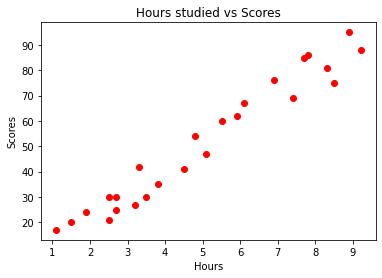

In [9]:
#plotting scatter plot
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours studied vs Scores')
plt.scatter(data.Hours,data.Scores,color='r')


In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [11]:
hours=data['Hours']
scores=data['Scores']

<AxesSubplot:xlabel='Hours', ylabel='Density'>

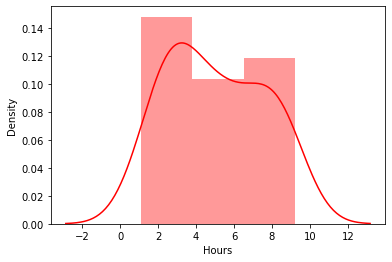

In [15]:
sns.distplot(hours,color='red')

<AxesSubplot:xlabel='Scores', ylabel='Density'>

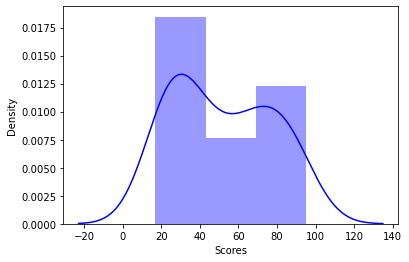

In [16]:
sns.distplot(scores,color='blue')

In [17]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values
print(x)
print(y)


[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# preparing the data & spliting into train & test sets

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

### fitting the simple linear regression to the training set

In [20]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [21]:
linreg.fit(x_train,y_train)

LinearRegression()

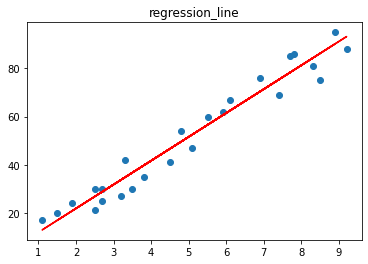

In [22]:
m=linreg.coef_
c=linreg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line,color='red')
plt.title("regression_line")
plt.show()

In [23]:
#making decision
y_pred=linreg.predict(x_test)
actual_predicted=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred})
actual_predicted                               

,Actual_value,Predicted_value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


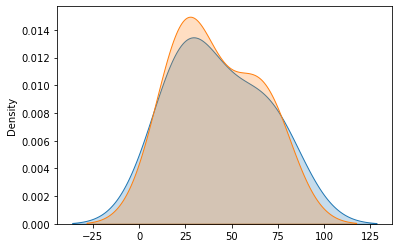

In [24]:
sns.kdeplot(y_pred,label="predicted",shade=True);
sns.kdeplot(data=y_test,label="Actual",shade=True);

what would be the predicted score if a student studies for 9.25 hour/day?

In [26]:
h=9.25
s=linreg.predict([[h]])
print("if student studies for {} hours/day,he/she will scores {} % in exam.".format(h,s))

if student studies for 9.25 hours/day,he/she will scores [93.69173249] % in exam.


# model evaluation 

In [27]:
from sklearn import metrics

In [28]:
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print('R2.Scores:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
R2.Scores: 0.9454906892105356
